<a href="https://colab.research.google.com/github/hamagami/is2024/blob/main/07_baggin_sklearn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bagging with scikit-learn regression

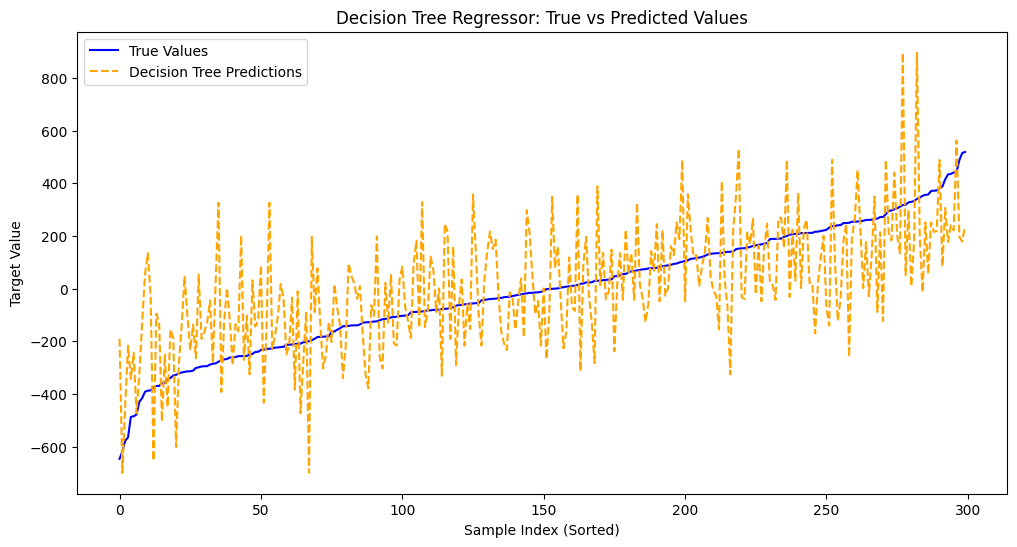

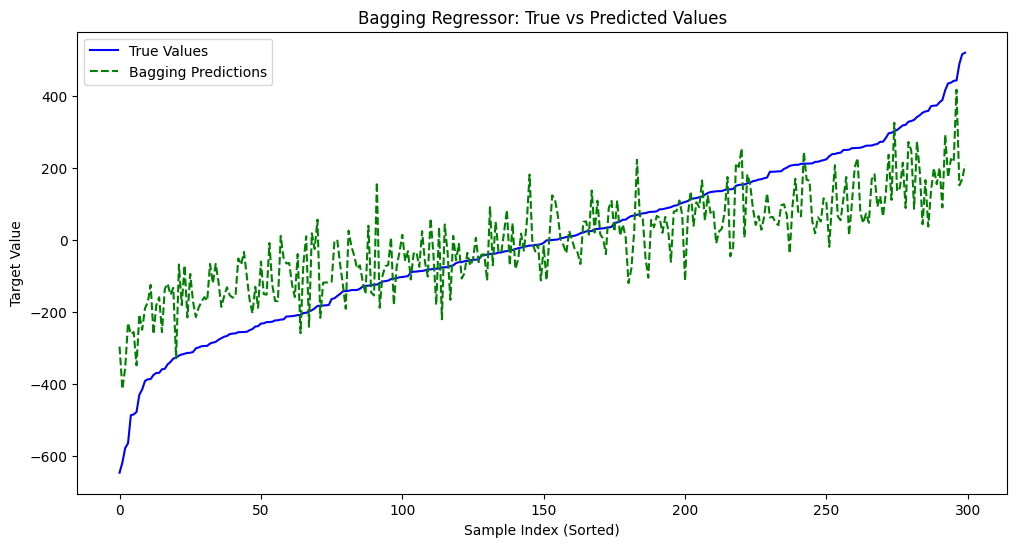

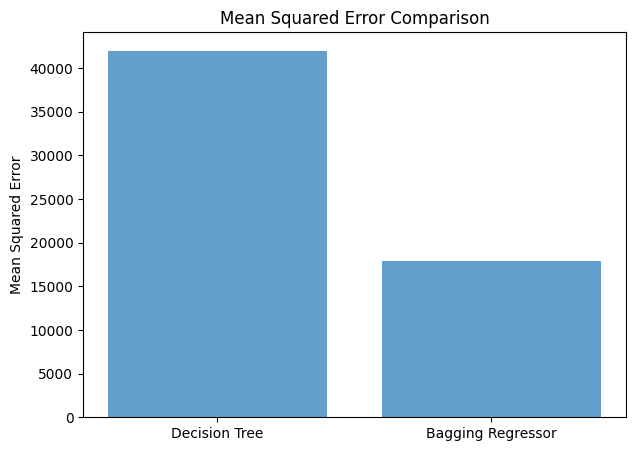

Mean Squared Error (Decision Tree): 42008.5183
Mean Squared Error (Bagging Regressor): 17888.1752


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Generate a regression dataset
X, y = make_regression(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    noise=0.1,
    random_state=42
)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a single Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)

# Train a Bagging Regressor with Decision Tree as base estimator
bagging = BaggingRegressor(
    estimator=DecisionTreeRegressor(),
    n_estimators=50,
    random_state=42,
    n_jobs=-1
)
bagging.fit(X_train, y_train)
y_pred_bagging = bagging.predict(X_test)
mse_bagging = mean_squared_error(y_test, y_pred_bagging)

# Sort indices for visualization purposes
sorted_indices = np.argsort(y_test)

# Plot true vs predicted values for Decision Tree Regressor
plt.figure(figsize=(12, 6))
plt.plot(
    np.arange(len(y_test)),
    y_test[sorted_indices],
    label="True Values",
    color="blue"
)
plt.plot(
    np.arange(len(y_test)),
    y_pred_dt[sorted_indices],
    label="Decision Tree Predictions",
    color="orange",
    linestyle="--"
)
plt.title("Decision Tree Regressor: True vs Predicted Values")
plt.xlabel("Sample Index (Sorted)")
plt.ylabel("Target Value")
plt.legend()
plt.show()

# Plot true vs predicted values for Bagging Regressor
plt.figure(figsize=(12, 6))
plt.plot(
    np.arange(len(y_test)),
    y_test[sorted_indices],
    label="True Values",
    color="blue"
)
plt.plot(
    np.arange(len(y_test)),
    y_pred_bagging[sorted_indices],
    label="Bagging Predictions",
    color="green",
    linestyle="--"
)
plt.title("Bagging Regressor: True vs Predicted Values")
plt.xlabel("Sample Index (Sorted)")
plt.ylabel("Target Value")
plt.legend()
plt.show()

# Compare MSE between the models
plt.figure(figsize=(7, 5))
models = ['Decision Tree', 'Bagging Regressor']
mse_values = [mse_dt, mse_bagging]
plt.bar(models, mse_values, alpha=0.7)
plt.title("Mean Squared Error Comparison")
plt.ylabel("Mean Squared Error")
plt.show()

print(f"Mean Squared Error (Decision Tree): {mse_dt:.4f}")
print(f"Mean Squared Error (Bagging Regressor): {mse_bagging:.4f}")
